#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 08
**CH08C Measurement error in hotel ratings**

using the hotels-vienna dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
from mizani.formatters import percent_format
from plotnine import *
import statsmodels.formula.api as smf

warnings.filterwarnings("ignore")

color = ['red','blue']

In [4]:
# load vienna
#hotels = pd.read_csv( "hotels-vienna.csv")
hotels = pd.read_csv("https://osf.io/y6jvb/download")

#### SAMPLE SELECTION

In [5]:
hotels = hotels.loc[
    (hotels["accommodation_type"] == "Hotel")
    & (hotels["city_actual"] == "Vienna")
    & (hotels["stars"] >= 3)
    & (hotels["stars"] <= 4)
    & (hotels["stars"].notna())
    & (hotels["price"] <= 600)
]

### Look at measurement error by rating count


In [6]:
hotels["lnprice"] = np.log(hotels["price"])

In [7]:
# define cutoffs
k1 = 100
k2 = 200

In [8]:
reg_me = smf.ols(
    formula="lnprice ~ rating", data=hotels.loc[hotels["rating_count"] < k1, :]
)
reg_me_fit = reg_me.fit()

In [9]:
print(reg_me_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                lnprice   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     24.20
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           4.99e-06
Time:                        18:40:20   Log-Likelihood:                -6.3405
No. Observations:                  77   AIC:                             16.68
Df Residuals:                      75   BIC:                             21.37
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.1375      0.285     11.025      0.0

In [10]:
hotels["yhat"] = reg_me_fit.predict(hotels)


In [11]:
reg_me2 = smf.ols(
    formula="lnprice ~ rating",
    data=hotels.loc[(hotels["rating_count"] >= k1) & (hotels["rating_count"] < k2), :],
)
reg_me_fit2 = reg_me2.fit()
reg_me_fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     13.52
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           0.000531
Time:                        18:40:23   Log-Likelihood:                -20.301
No. Observations:                  58   AIC:                             44.60
Df Residuals:                      56   BIC:                             48.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9129      0.482      6.038      0.000       1.946       3.879
rating         0.4380      0.119      3.676      0.001       0.199       0.677
==============================================================================
Omnibus:                       19.349   Durbin-Watson:                   1.496
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.243
Skew:                           1.223   Prob(JB):                     1.21e-06
Kurtosis:                       5.301   Cond. No.                         45.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
hotels["yhat2"] = reg_me_fit2.predict(hotels)


In [13]:
reg_me3 = smf.ols(
    formula="lnprice ~ rating", data=hotels.loc[hotels["rating_count"] >= k2, :]
)
reg_me_fit3 = reg_me3.fit()
reg_me_fit3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lnprice   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     22.60
Date:                Mon, 11 Nov 2024   Prob (F-statistic):           1.03e-05
Time:                        18:40:29   Log-Likelihood:                -4.1624
No. Observations:                  72   AIC:                             12.32
Df Residuals:                      70   BIC:                             16.88
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3895      0.493      4.849      0.000       1.407       3.372
rating         0.5558      0.117      4.754      0.000       0.323       0.789
==============================================================================
Omnibus:                        2.670   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.263   Jarque-Bera (JB):                1.857
Skew:                          -0.193   Prob(JB):                        0.395
Kurtosis:                       2.314   Cond. No.                         71.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
hotels["yhat3"] = reg_me_fit3.predict(hotels)


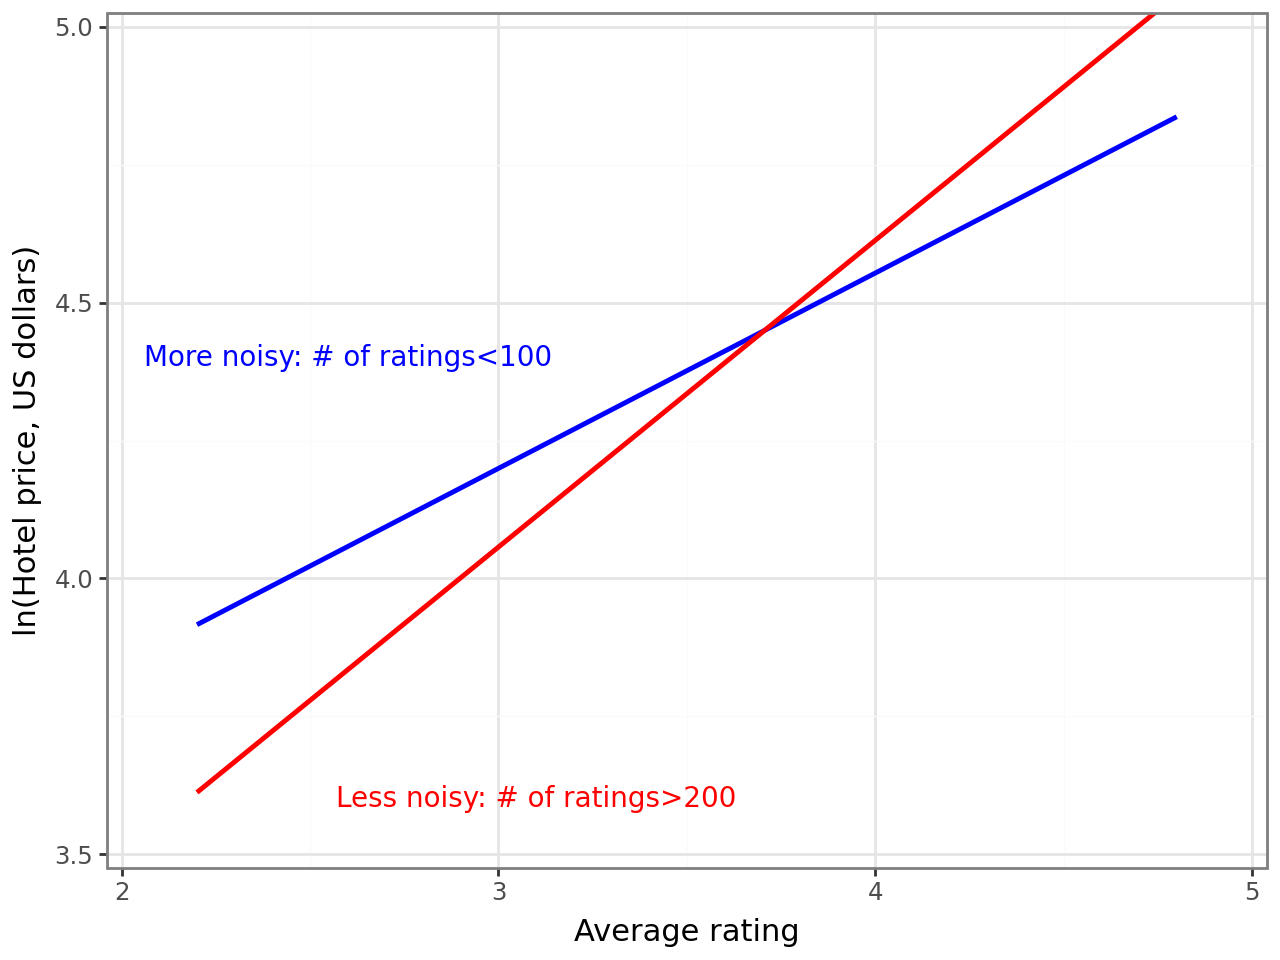

In [15]:
(
    ggplot(hotels)
    + geom_line(aes(x="rating", y="yhat"), color=color[1], size=1)
    + geom_line(aes(x="rating", y="yhat3"), color=color[0], size=1)
    + coord_cartesian(xlim=[2, 5], ylim=[3.5, 5])
    + expand_limits(x=0.01, y=0.01)
    + scale_y_continuous(expand=[0.01, 0.01])
    + scale_x_continuous(expand=[0.01, 0.01], limits=[2, 5])#, breaks=seq(2, 5, 0.5))
    + labs(x="Average rating", y="ln(Hotel price, US dollars)")
    + theme_bw()
    + annotate(
        "text",
        x=2.6,
        y=4.4,
        label="More noisy: # of ratings<100",
        size=10,
        color=color[1],
    )
    + annotate(
        "text",
        x=3.1,
        y=3.6,
        label="Less noisy: # of ratings>200",
        size=10,
        color=color[0],
    )
)
